In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv("Market_Clearing_Price-01072023-01072024.csv", sep = ";")
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'], format='%d.%m.%Y %H:%M')
df.set_index('datetime', inplace=True)
df = df[["MCP (TL/MWh)"]]
df['MCP (TL/MWh)'] = df['MCP (TL/MWh)'].replace({',': ''}, regex=True).astype(float)
df.head(25)

,MCP (TL/MWh)
datetime,
2023-07-01 00:00:00,2600.00
2023-07-01 01:00:00,2499.99
2023-07-01 02:00:00,2200.00
2023-07-01 03:00:00,2200.00
2023-07-01 04:00:00,1550.00
2023-07-01 05:00:00,1244.67
2023-07-01 06:00:00,1799.99
2023-07-01 07:00:00,1249.99
2023-07-01 08:00:00,972.23


The MCP for each hour is most strongly correlated with the previous hour. It also shows significant correlation with the 25th and 49th hours, indicating a daily seasonal pattern.

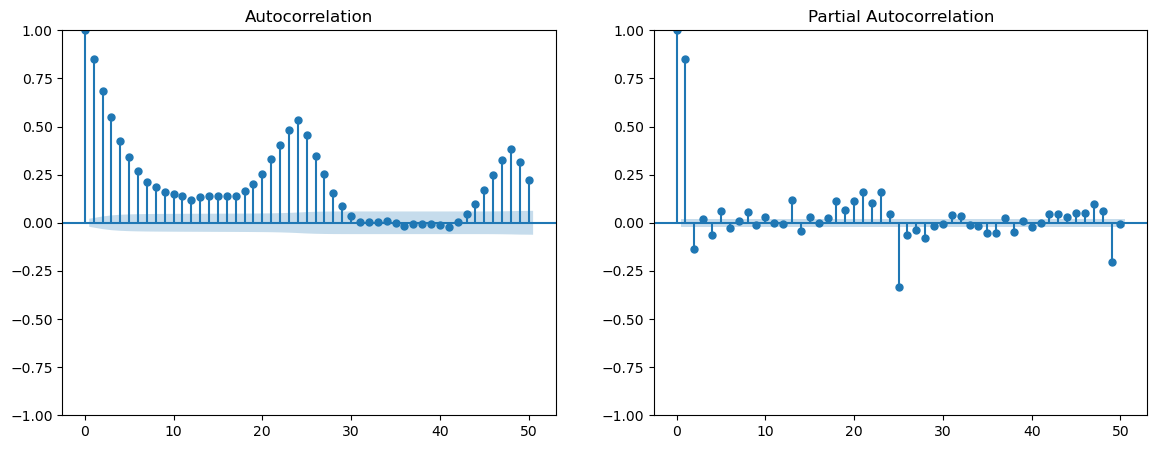

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df['MCP (TL/MWh)'], lags=50, ax=axes[0])
plot_pacf(df['MCP (TL/MWh)'], lags=50, ax=axes[1])
plt.show()

The average MCP for each day is correlated with both the previous day and the same day in previous weeks, indicating a weekly seasonal pattern.

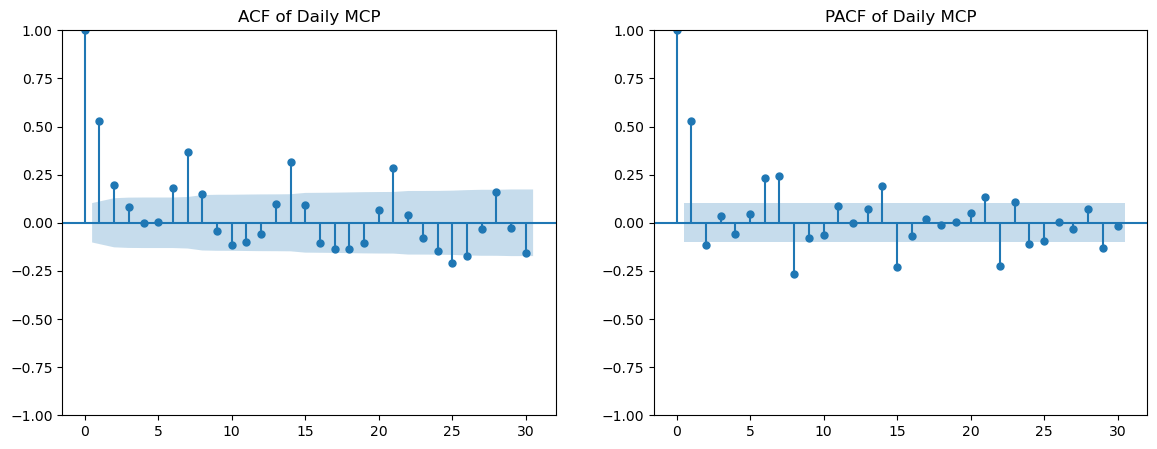

In [4]:
daily_avg = df['MCP (TL/MWh)'].resample("D").mean()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(daily_avg, lags=30, ax=axes[0])
plot_pacf(daily_avg, lags=30, ax=axes[1])
axes[0].set_title('ACF of Daily MCP')
axes[1].set_title('PACF of Daily MCP')
plt.show()

The average MCP for each week is correlated only with the MCP of the previous week.

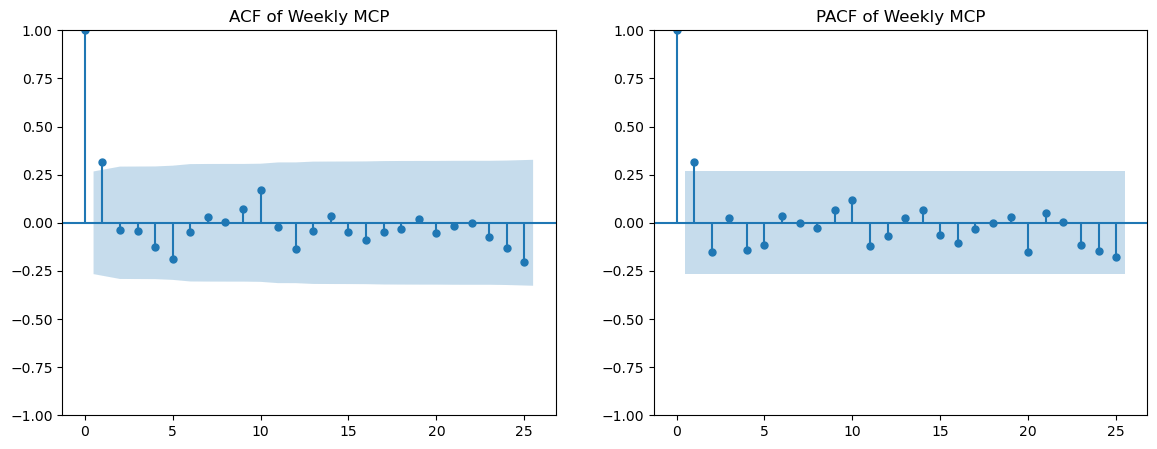

In [5]:
weekly_avg = df['MCP (TL/MWh)'].resample('W').mean()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(weekly_avg, lags=25, ax=axes[0])
plot_pacf(weekly_avg, lags=25, ax=axes[1])  
axes[0].set_title('ACF of Weekly MCP')
axes[1].set_title('PACF of Weekly MCP')
plt.show()

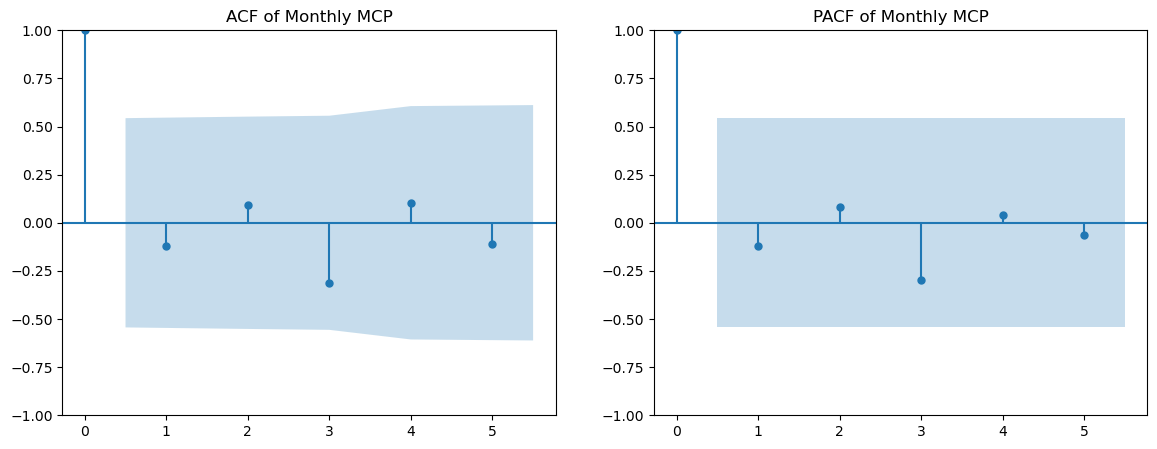

In [6]:
monthly_avg = df['MCP (TL/MWh)'].resample('M').mean()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(monthly_avg, lags=5, ax=axes[0])
plot_pacf(monthly_avg, lags=5, ax=axes[1])  
axes[0].set_title('ACF of Monthly MCP')
axes[1].set_title('PACF of Monthly MCP')
plt.show()

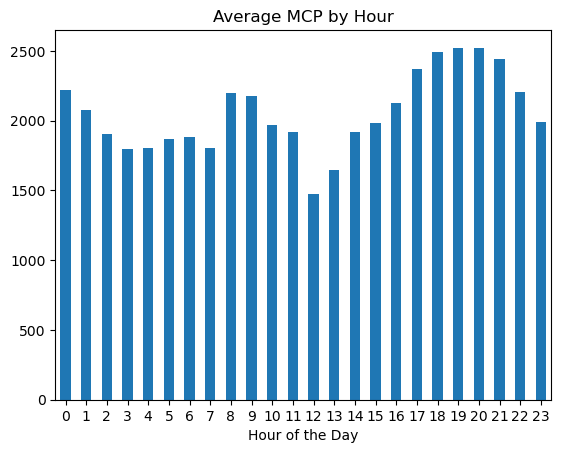

In [7]:
df["Hour"] = df.index.hour
hourly_avg = df.groupby('Hour')['MCP (TL/MWh)'].mean()
hourly_avg.plot(kind="bar", title="Average MCP by Hour", xlabel="Hour of the Day", legend=False)
plt.xticks(rotation=0)
plt.show()

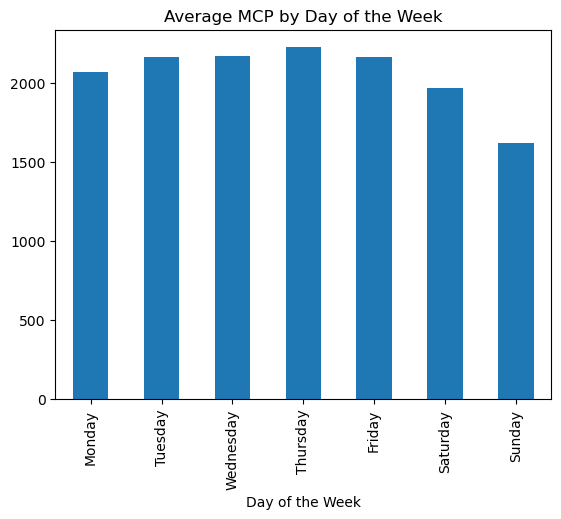

In [8]:
df["day"] = df.index.day_name()
day_avg = df.groupby("day")["MCP (TL/MWh)"].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_avg.plot(kind="bar", title="Average MCP by Day of the Week", xlabel= "Day of the Week")
plt.show()

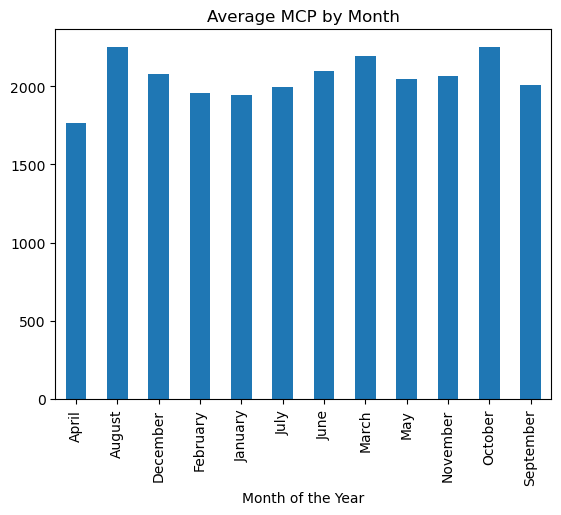

In [9]:
df["Month"] = df.index.month_name()

month_avg = df.groupby("Month")["MCP (TL/MWh)"].mean()
  
month_avg.plot(kind='bar', title='Average MCP by Month', xlabel='Month of the Year', legend=False)
plt.show()